In [1]:
import matplotlib.pyplot as plt 
import numpy as np
plt.figure(dpi=120) 
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder 
from yellowbrick.classifier import ROCAUC 
from yellowbrick.datasets import load_hobbies
from sklearn.feature_extraction.text import TfidfVectorizer

<Figure size 768x576 with 0 Axes>

In [2]:
# Load data 
corpus = load_hobbies()
X = TfidfVectorizer().fit_transform(corpus.data)
y = LabelEncoder().fit_transform(corpus.target)
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)


In [3]:
np.unique(y)

array([0, 1, 2, 3, 4])

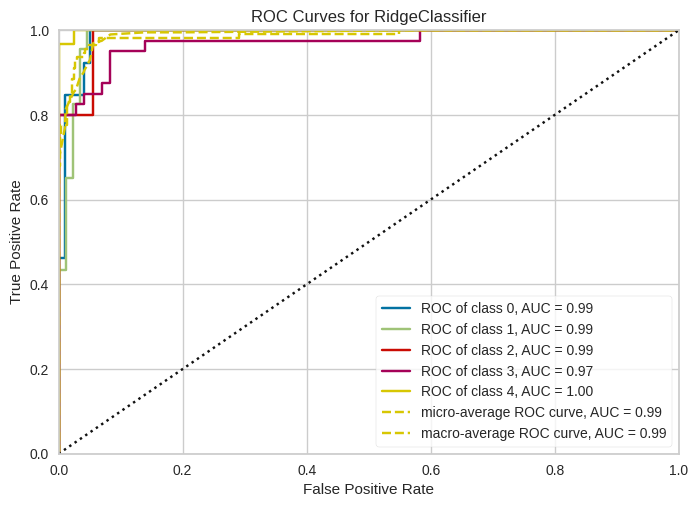

<Axes: title={'center': 'ROC Curves for RidgeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [4]:
# Build a model and draw the ROC 
model = RidgeClassifier()
visualizer = ROCAUC(model, classes=[0, 1, 2, 3, 4]) 
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) # Evaluation 
visualizer.show() 

In [5]:
plt.figure(dpi=120) 
from yellowbrick.features import PCA 
from yellowbrick.datasets import load_spam

X, y = load_spam() 

<Figure size 960x660 with 0 Axes>

In [6]:
np.unique(y)

array([0, 1])

/usr/local/lib/python3.9/dist-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


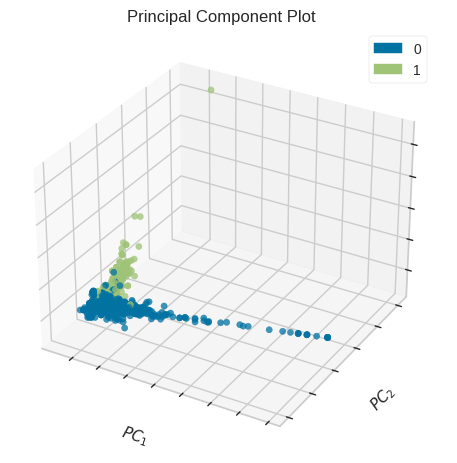

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [7]:
classes = [0, 1] 
visualizer = PCA(scale=True, projection=3, classes=classes) 
visualizer.fit_transform(X, y) 
visualizer.show() 

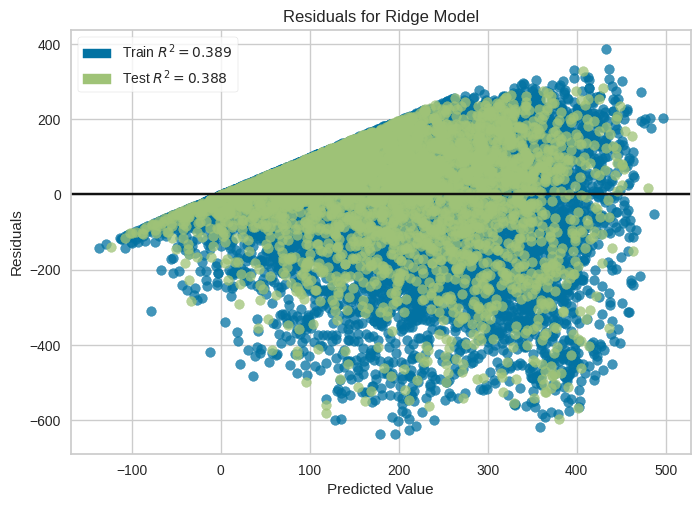

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [8]:
from sklearn.linear_model import Ridge 
from yellowbrick.datasets import load_bikeshare 
from yellowbrick.regressor import ResidualsPlot 
X, y = load_bikeshare() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

moddel = Ridge() 
visualizer = ResidualsPlot(moddel, hist=False, ggplot=True) 
visualizer.fit(X_train,y_train) 

visualizer.score(X_test,y_test)
visualizer.show()

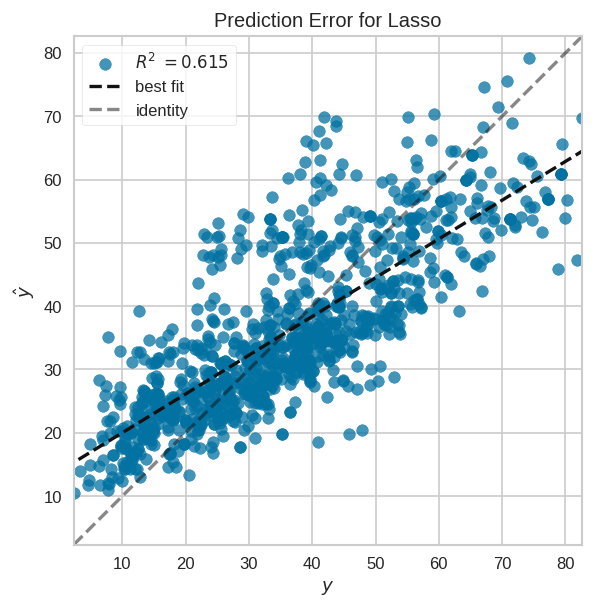

In [9]:
plt.figure(dpi=120) 
from sklearn.linear_model import Lasso 
from yellowbrick.datasets import load_concrete  
from yellowbrick.regressor import prediction_error

X, y = load_concrete()  
visualizer = prediction_error(Lasso(), X, y) # Only one line of code! 


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


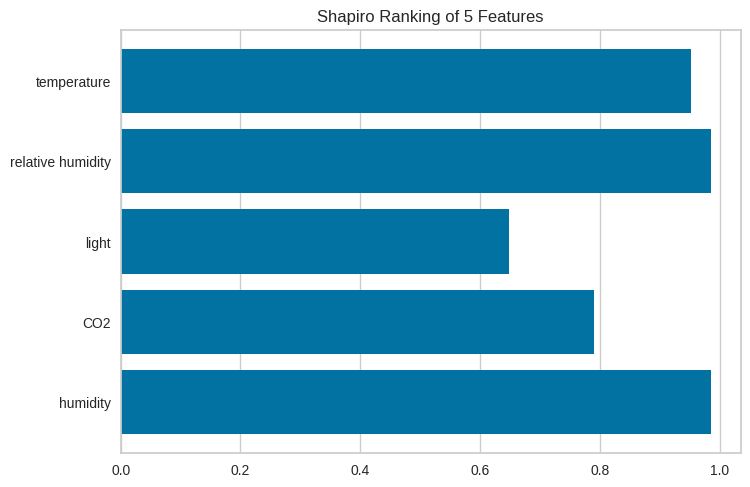

<Axes: title={'center': 'Shapiro Ranking of 5 Features'}>

In [10]:
from yellowbrick.features import Rank1D
from yellowbrick.datasets import load_occupancy

X, y = load_occupancy() 

visualizer = Rank1D(algorithm='shapiro') 
visualizer.fit (X, y)
visualizer.transform(X) 
visualizer.show() 

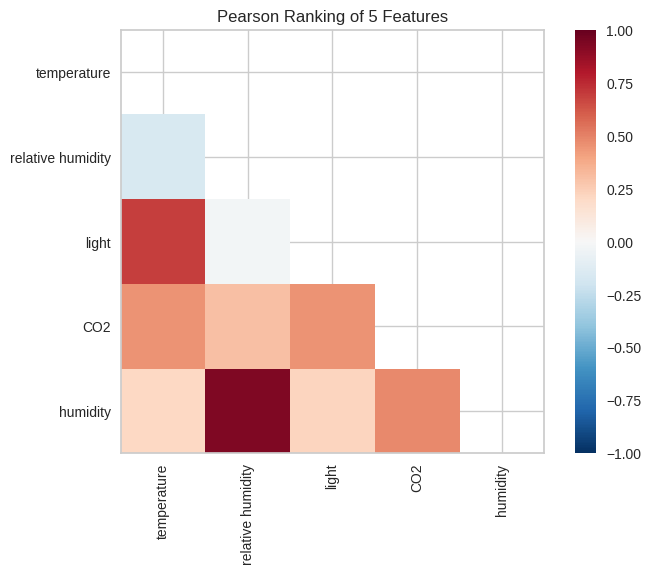

<Axes: title={'center': 'Pearson Ranking of 5 Features'}>

In [11]:
from yellowbrick.features import Rank2D 
X, y = load_occupancy() 

visualizer = Rank2D(algorithm='pearson') 
visualizer.fit(X, y) 
visualizer.transform(X) 
visualizer.show() 

In [12]:
from yellowbrick.features import ParallelCoordinates 
from yellowbrick.datasets import load_credit
X, y = load_credit()

In [13]:
np.unique(y)

array([0, 1])

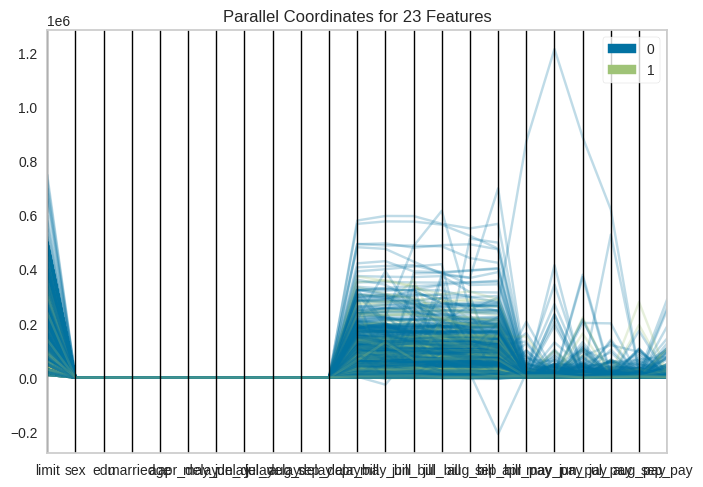

<Axes: title={'center': 'Parallel Coordinates for 23 Features'}>

In [14]:
# Specify the features of interest and the classes of the target 
features = list(X.columns)
classes = [0, 1]
visualizer = ParallelCoordinates( 
    classes=classes, features=features, sample=0.05, shuffle=True )
visualizer.fit_transform(X, y) 
visualizer.show() 

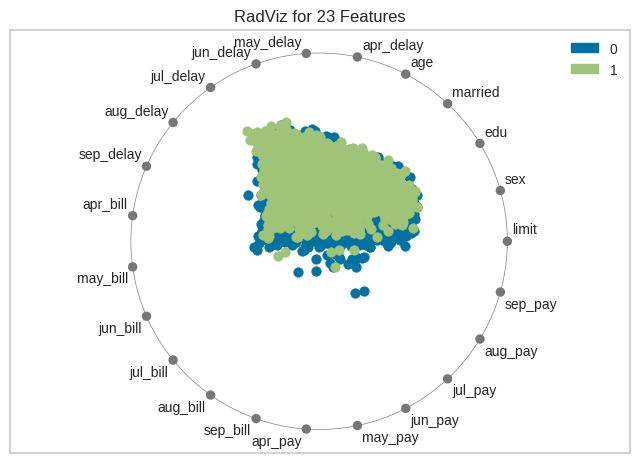

<Axes: title={'center': 'RadViz for 23 Features'}>

In [15]:
from yellowbrick.features import RadViz 
X, y = load_credit()

# Specify the target classes 
classes = [0, 1] 
visualizer = RadViz(classes=classes) 
visualizer.fit(X, y) 
visualizer.transform(X) 
visualizer.show() 

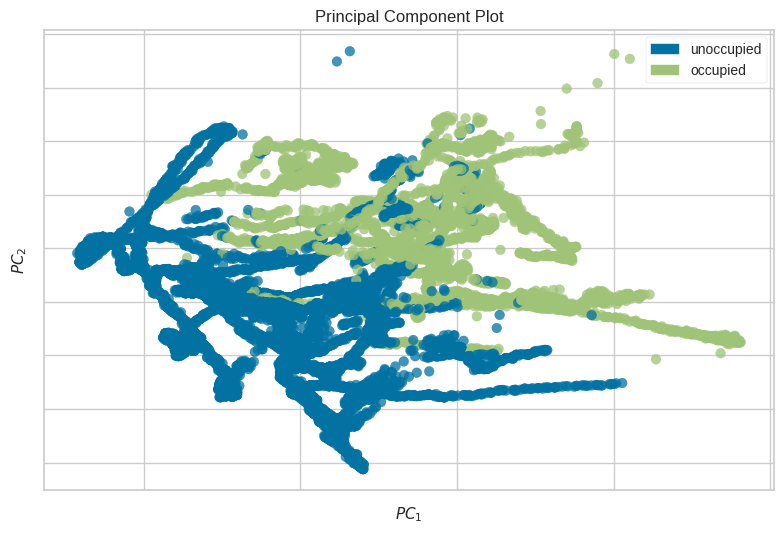

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [16]:
from yellowbrick.features import PCA 
# Specify the features of interest and the target 
X, y = load_occupancy() 
classes = ["unoccupied", "occupied"]  
visualizer = PCA(scale=True, classes=classes) 
visualizer.fit_transform(X, y) 
visualizer.show() 

In [17]:
from yellowbrick.features import Manifold 

X, y = load_spam() 

In [18]:
np.unique(y)

array([0, 1])

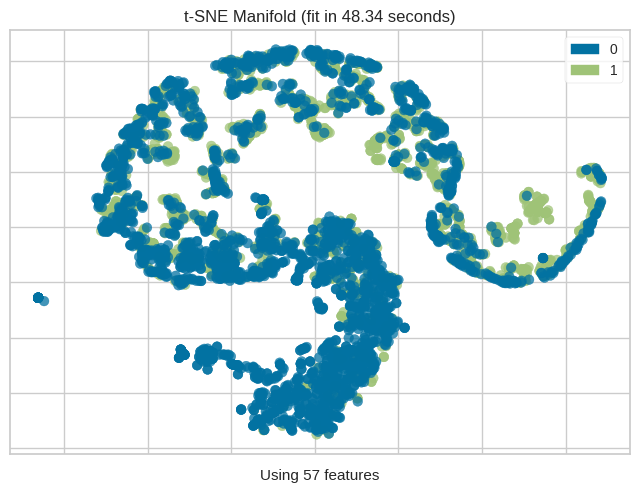

<Axes: title={'center': 't-SNE Manifold (fit in 48.34 seconds)'}, xlabel='Using 57 features'>

In [19]:
classes = [0,1] 
viz = Manifold(manifold="tsne", classes=classes) 
viz.fit_transform(X, y) 
viz.show() 

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


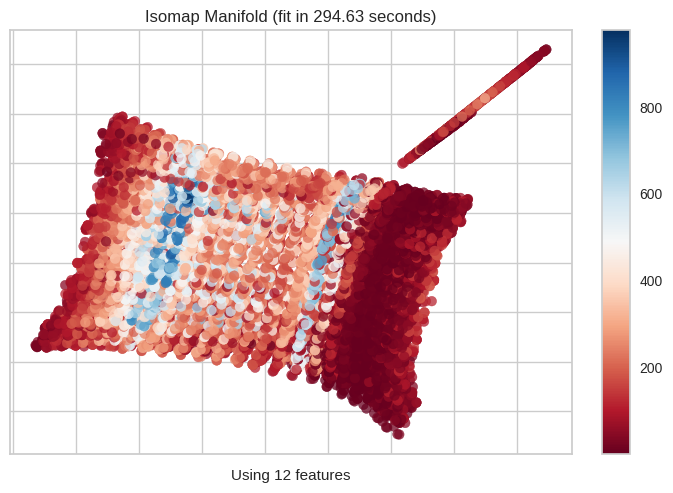

<Axes: title={'center': 'Isomap Manifold (fit in 294.63 seconds)'}, xlabel='Using 12 features'>

In [25]:
from yellowbrick.features import Manifold 

X, y = load_bikeshare() 

viz = Manifold(manifold="isomap", n_neighbors=10)
viz.fit_transform(X, y) 
viz.show() 

In [22]:
from yellowbrick.features import JointPlotVisualizer 
X, y = load_bikeshare()

In [23]:
X.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


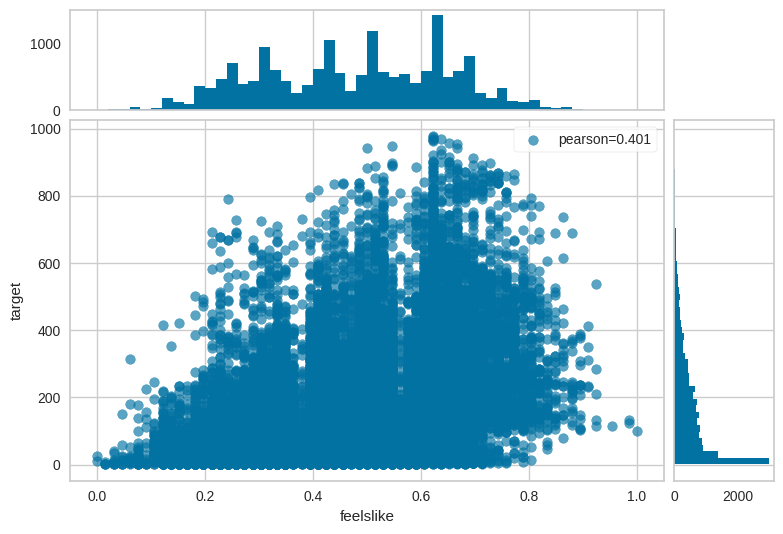

<Axes: xlabel='feelslike', ylabel='target'>

In [24]:
visualizer = JointPlotVisualizer(columns="feelslike") 
visualizer.fit_transform(X, y) 
visualizer.show() 